# AGE FACE

pythonファイルで実行できる様になっております。

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from PIL import Image
import numpy as np

今回使ったモデルの重みを読み込み、保存

In [42]:
import logging
import sys
import numpy as np
from keras.models import Model
from keras.layers import Input, Activation, add, Dense, Flatten, Dropout, Multiply
from keras.layers.convolutional import Conv2D, AveragePooling2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras import backend as K

sys.setrecursionlimit(2 ** 20)
np.random.seed(2 ** 10)


class TYY_2stream:
    def __init__(self, image_size):
        
        self._dropout_probability = 0
        self._weight_decay = 0.0005
        self._use_bias = False
        self._weight_init = "he_normal"

        if K.image_dim_ordering() == "th":
            logging.debug("image_dim_ordering = 'th'")
            self._channel_axis = 1
            self._input_shape = (3, image_size, image_size)
        else:
            logging.debug("image_dim_ordering = 'tf'")
            self._channel_axis = -1
            self._input_shape = (image_size, image_size, 3)


#    def create_model(self):
    def c_model(self):
        logging.debug("Creating model...")


        inputs = Input(shape=self._input_shape)

        x = Conv2D(32,(3,3),activation='relu')(inputs)
        x = MaxPooling2D(2,2)(x)
        x = Conv2D(32,(3,3),activation='relu')(x)
        x = MaxPooling2D(2,2)(x)
        x = Conv2D(64,(3,3),activation='relu')(x)
        

        y = Conv2D(32,(3,3),activation='relu')(inputs)
        y = MaxPooling2D(2,2)(y)
        y = Conv2D(32,(3,3),activation='relu')(y)
        y = MaxPooling2D(2,2)(y)
        y = Conv2D(64,(3,3),activation='tanh')(y)
        
        z = Multiply()([x,y])
        z = BatchNormalization(axis=self._channel_axis)(z)

        # Classifier block
        pool = AveragePooling2D(pool_size=(8, 8), strides=(1, 1), padding="same")(z)
        flatten = Flatten()(pool)
        predictions_g = Dense(units=2, kernel_initializer=self._weight_init, use_bias=self._use_bias,
                              kernel_regularizer=l2(self._weight_decay), activation="softmax")(flatten)
        predictions_a = Dense(units=21, kernel_initializer=self._weight_init, use_bias=self._use_bias,
                              kernel_regularizer=l2(self._weight_decay), activation="softmax")(flatten)

        model = Model(inputs=inputs, outputs=[predictions_g, predictions_a])



        return model

class TYY_1stream:
    def __init__(self, image_size):
        
        self._dropout_probability = 0
        self._weight_decay = 0.0005
        self._use_bias = False
        self._weight_init = "he_normal"

        if K.image_dim_ordering() == "th":
            logging.debug("image_dim_ordering = 'th'")
            self._channel_axis = 1
            self._input_shape = (3, image_size, image_size)
        else:
            logging.debug("image_dim_ordering = 'tf'")
            self._channel_axis = -1
            self._input_shape = (image_size, image_size, 3)


#    def create_model(self):
    def c_model(self):
        logging.debug("Creating model...")


        inputs = Input(shape=self._input_shape)

        x = Conv2D(32,(3,3),activation='relu')(inputs)
        x = MaxPooling2D(2,2)(x)
        x = Conv2D(32,(3,3),activation='relu')(x)
        x = MaxPooling2D(2,2)(x)
        x = Conv2D(64,(3,3),activation='relu')(x)
        x = MaxPooling2D(2,2)(x)
        x = Conv2D(64,(3,3),activation='relu')(x)
        x = BatchNormalization(axis=self._channel_axis)(x)

        # Classifier block
        pool = AveragePooling2D(pool_size=(4, 4), strides=(1, 1), padding="same")(x)
        flatten = Flatten()(pool)
        predictions_g = Dense(units=2, kernel_initializer=self._weight_init, use_bias=self._use_bias,
                              kernel_regularizer=l2(self._weight_decay), activation="softmax")(flatten)
        predictions_a = Dense(units=21, kernel_initializer=self._weight_init, use_bias=self._use_bias,
                              kernel_regularizer=l2(self._weight_decay), activation="softmax")(flatten)

        model = Model(inputs=inputs, outputs=[predictions_g, predictions_a])



        return model

In [52]:
model = TYY_1stream(128)

In [53]:
model = model.c_model()

In [24]:
model.save("face_age.model")

In [25]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 62, 62, 32)   896         input_4[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_11 (MaxPooling2D) (None, 31, 31, 32)   0           conv2d_15[0][0]                  
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 29, 29, 32)   9248        max_pooling2d_11[0][0]           
__________________________________________________________________________________________________
max_poolin

これでモデルを読み込めば使える様になりました。
使ってみましょう

In [9]:
import face_recognition
import keras

In [4]:
img = Image.open("image/test/akb.jpg")

まずは顔のディテクションを抽出します。  
実際はfor分で回し全ての顔を拾ってきます。

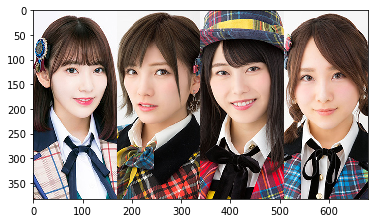

In [5]:
plt.imshow(img)

In [10]:
model = keras.models.load_model("face_age.model")

In [14]:
X_img = face_recognition.load_image_file("image/test/akb.jpg")
X_face_locations = face_recognition.face_locations(X_img)

In [16]:
age = []
for i in X_face_locations:
    top, right, bottom, left = i
    img = Image.fromarray(np.uint8(X_img[top:bottom, left:right]))
    img = img.resize((64,64))
    img = np.array(img).reshape(1,64,64,3)
    results = model.predict(img)

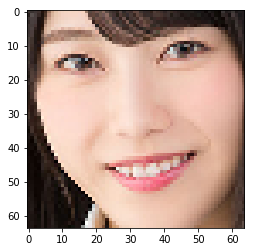

In [20]:
plt.imshow(img[0])

In [21]:
results

[array([[0.52444863, 0.47555137]], dtype=float32),
 array([[0.00021275, 0.00095144, 0.00895325, 0.02314079, 0.03465243,
         0.14340477, 0.1587199 , 0.15018257, 0.14782235, 0.09717576,
         0.07600234, 0.06572851, 0.03944186, 0.02654563, 0.01170089,
         0.00747403, 0.0042012 , 0.0018601 , 0.00110364, 0.00041594,
         0.00030982]], dtype=float32)]

これでモデルからの出力と顔の検出ができていることが確認できました。  
実際にできた画像を出力してみます。

In [23]:
import face_age

In [31]:
import os

In [42]:
predictions = face_age.predict("image/test/akb.jpg")
img = face_age.show_prediction_labels_on_image(os.path.join("image/test", "akb.jpg"), predictions)

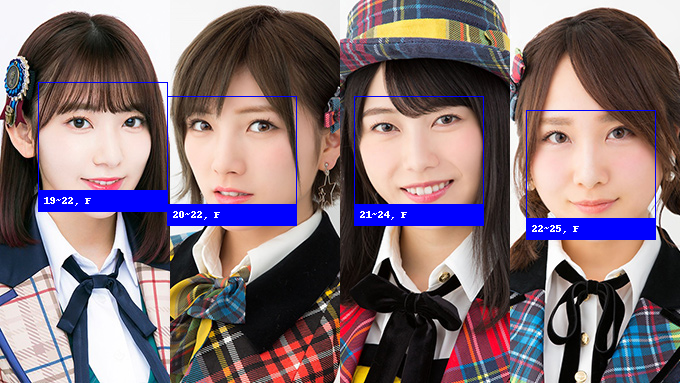

In [44]:
Image.open("tmp1rwvzjrj.png")

それなりに近い年齢が出てる気がします。

# ベンチマークモデル
今回はMicrosoftの年齢と性別を測定するサイト『How Old Do I Look?』と比較してみます。

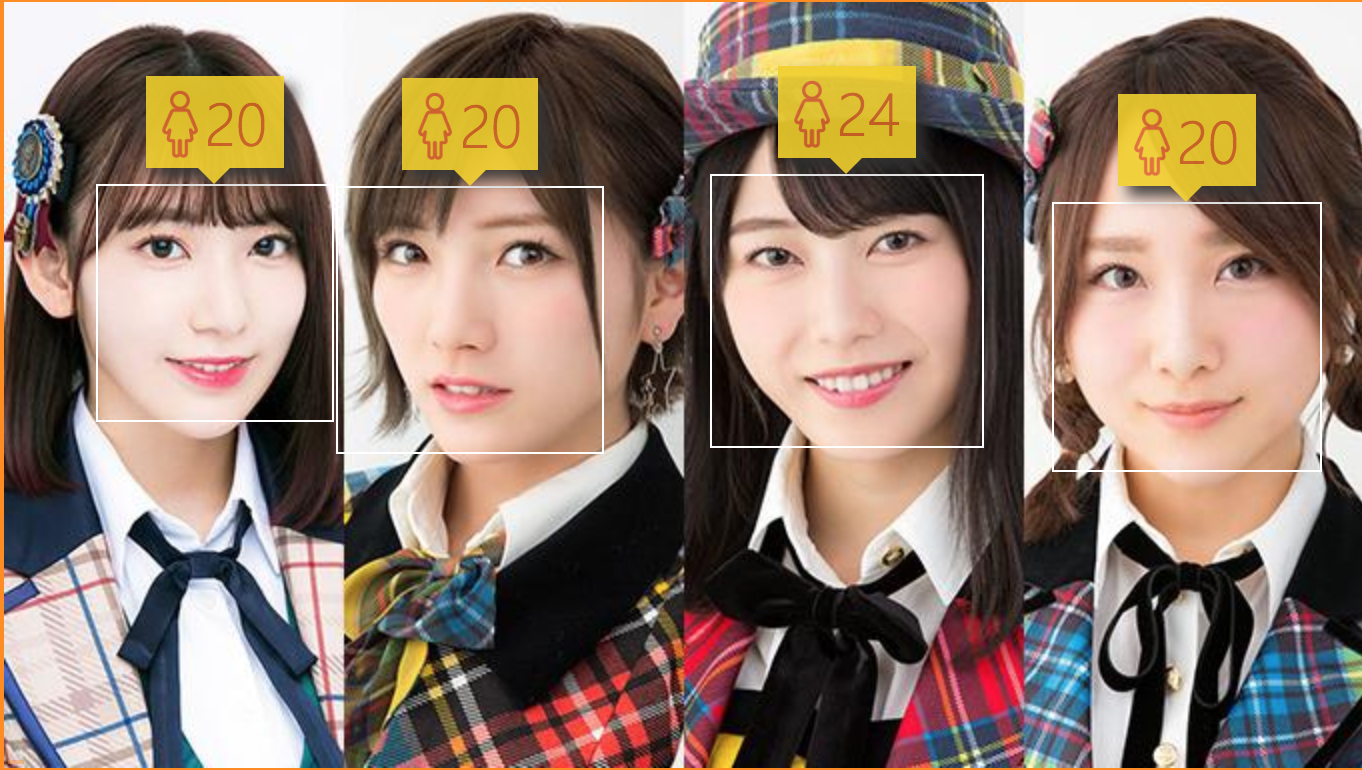

In [47]:
Image.open("how_old.png")

それなりに近い精度が出ていると思います。